<a href="https://colab.research.google.com/github/blackdevil2098/blackdevil2098/blob/main/irisproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

To classify data-points in classes Iris-Setosa, Iris-Versicolor, Iris-Virginica

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

sns.set_style("darkgrid")
%matplotlib inline

In [145]:
df = pd.read_csv('/content/drive/MyDrive/ML/IRIS (1) (1).csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [146]:
from sklearn.datasets import load_iris

data = load_iris()
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

feature_set = pd.DataFrame(data.data, columns=cols)

species = pd.Series(data.target, name="species").map({
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
})


iris_data = pd.merge(feature_set, species, left_index=True, right_index=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [148]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



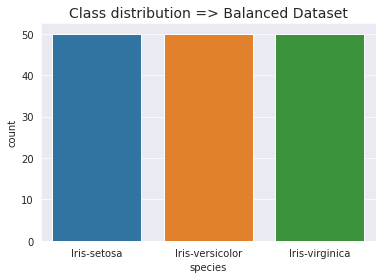

In [149]:
_ = sns.countplot(iris_data.species)
_ = plt.title("Class distribution => Balanced Dataset", fontsize=14)

In [150]:
iris_setosa = iris_data.loc[iris_data.species == "Iris-setosa"]
iris_versicolor = iris_data.loc[iris_data.species == "Iris-versicolor"]
iris_virginica = iris_data.loc[iris_data.species == "Iris-virginica"]

In [151]:
print("Setosa mean: ", np.mean(iris_setosa['petal_length']))
print("Setosa corrupted mean: ", np.mean(np.append(iris_setosa['petal_length'], 50)))
print("versicolor mean: ", np.mean(iris_versicolor['petal_length']))
print("virginica mean: ",  np.mean(iris_virginica['petal_length']))
print()
print("Setosa variance: ", np.var(iris_setosa['petal_length']))
print("Setosa corrupted variance: ", np.var(np.append(iris_setosa['petal_length'], 50)))
print("versicolor variance: ", np.var(iris_versicolor['petal_length']))
print("virginica variance: ", np.var(iris_virginica['petal_length']))
print() 
print("Setosa std: ", np.std(iris_setosa['petal_length']))
print("Setosa corrupted std: ", np.std(np.append(iris_setosa['petal_length'], 50)))
print("versicolor std: ", np.std(iris_versicolor['petal_length']))
print("virginica std: ", np.std(iris_virginica['petal_length']))

Setosa mean:  1.4620000000000002
Setosa corrupted mean:  2.4137254901960787
versicolor mean:  4.26
virginica mean:  5.552

Setosa variance:  0.02955600000000001
Setosa corrupted variance:  45.31804690503652
versicolor variance:  0.21640000000000012
virginica variance:  0.2984960000000002

Setosa std:  0.17191858538273286
Setosa corrupted std:  6.731868010072429
versicolor std:  0.4651881339845204
virginica std:  0.5463478745268441


In [152]:
print("Median: ")
print("Setosa Median: ", np.median(iris_setosa['petal_length']))
print("Setosa corrupted Median: ", np.median(np.append(iris_setosa['petal_length'], 50)))
print("versicolor Median: ", np.median(iris_versicolor['petal_length']))
print("virginica Median: ",  np.median(iris_virginica['petal_length']))

print("\nQuantiles: [0, 25, 50, 75]")
print("Setosa Quantile: ", np.percentile(iris_setosa['petal_length'], np.arange(0, 100, 25)))
print("Setosa corrupted Quantile: ", np.percentile(np.append(iris_setosa['petal_length'], 50), np.arange(0, 100, 25)))
print("versicolor Quantile: ", np.percentile(iris_versicolor['petal_length'], np.arange(0, 100, 25)))
print("virginica Quantile: ", np.percentile(iris_virginica['petal_length'], np.arange(0, 100, 25)))

print("\n90th Percentiles")
print("Setosa Percentile: ", np.percentile(iris_setosa['petal_length'], 90))
print("Setosa corrupted Percentile: ", np.percentile(np.append(iris_setosa['petal_length'], 50), 90))
print("versicolor Percentile: ", np.percentile(iris_versicolor['petal_length'], 90))
print("virginica Percentile: ", np.percentile(iris_virginica['petal_length'], 90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print("Setosa MAD: ", robust.mad(iris_setosa['petal_length']))
print("Setosa corrupted MAD: ", robust.mad(np.append(iris_setosa['petal_length'], 50)))
print("versicolor MAD: ", robust.mad(iris_versicolor['petal_length']))
print("virginica MAD: ", robust.mad(iris_virginica['petal_length']))

Median: 
Setosa Median:  1.5
Setosa corrupted Median:  1.5
versicolor Median:  4.35
virginica Median:  5.55

Quantiles: [0, 25, 50, 75]
Setosa Quantile:  [1.    1.4   1.5   1.575]
Setosa corrupted Quantile:  [1.  1.4 1.5 1.6]
versicolor Quantile:  [3.   4.   4.35 4.6 ]
virginica Quantile:  [4.5   5.1   5.55  5.875]

90th Percentiles
Setosa Percentile:  1.7
Setosa corrupted Percentile:  1.7
versicolor Percentile:  4.8
virginica Percentile:  6.31

Median Absolute Deviation
Setosa MAD:  0.14826022185056031
Setosa corrupted MAD:  0.14826022185056031
versicolor MAD:  0.5189107764769602
virginica MAD:  0.6671709983275211


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

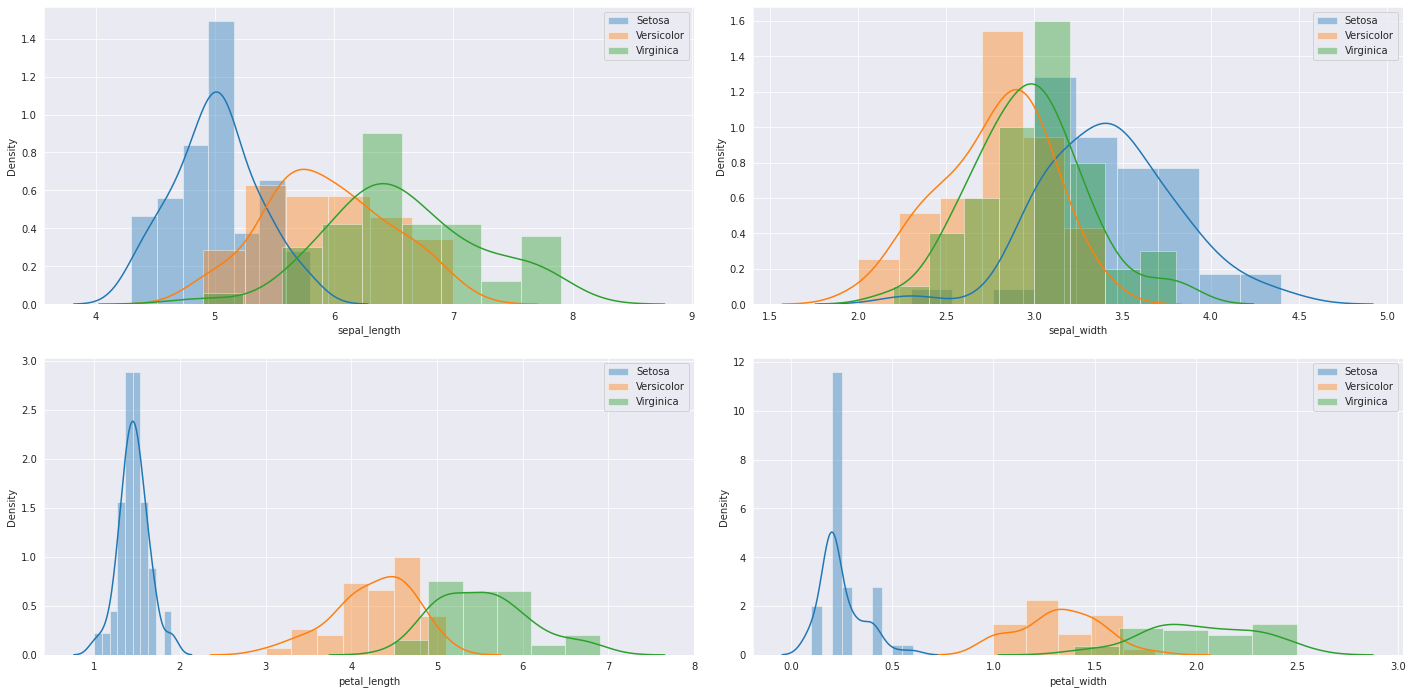

In [153]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for no, column in enumerate(iris_data.columns[:-1], 1):
    ax = fig.add_subplot(2, 2, no)
    sns.distplot(iris_data.loc[iris_data.species == 'Iris-setosa', f"{column}"], label="Setosa")
    sns.distplot(iris_data.loc[iris_data.species == 'Iris-versicolor', f"{column}"], label="Versicolor")
    sns.distplot(iris_data.loc[iris_data.species == 'Iris-virginica', f"{column}"], label="Virginica")
    ax.legend()

plt.tight_layout(pad=2.0)
plt.show()

PDF:  [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
CDF:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


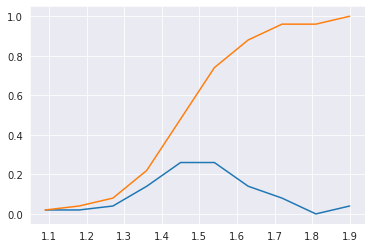

In [154]:
counts, bin_edges = np.histogram(iris_data.loc[iris_data.species == 'Iris-setosa', 'petal_length'],
                                bins=10, density=True)

pdf = counts/sum(counts)
print("PDF: ", pdf)
print("CDF: ", bin_edges)

# cdf 
cdf = np.cumsum(pdf)
_ = plt.plot(bin_edges[1:], pdf)
_ = plt.plot(bin_edges[1:], cdf)

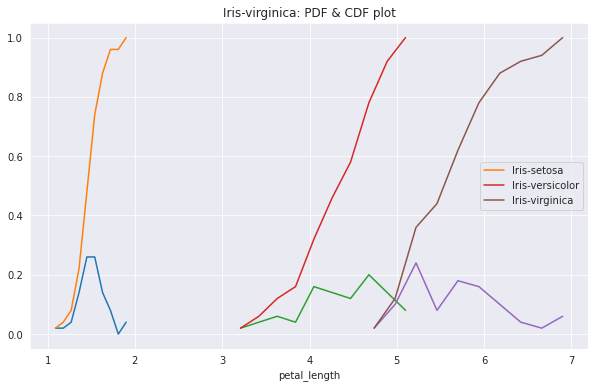

In [155]:
fig = plt.figure(figsize=(10, 6))

for i, cls in enumerate(iris_data.species.unique(), 1):
    counts, bin_edges = np.histogram(iris_data.loc[iris_data.species == f'{cls}', 'petal_length'],
                                    bins=10, density=True)

    pdf = counts/sum(counts)
    # print("PDF: ", pdf)
    # print("CDF: ", bin_edges)

    # cdf 
    cdf = np.cumsum(pdf)
    _ = plt.plot(bin_edges[1:], pdf)
    _ = plt.plot(bin_edges[1:], cdf, label=f'{cls}')

plt.title(f"{cls}: PDF & CDF plot")
plt.xlabel("petal_length")
plt.legend()
plt.show()

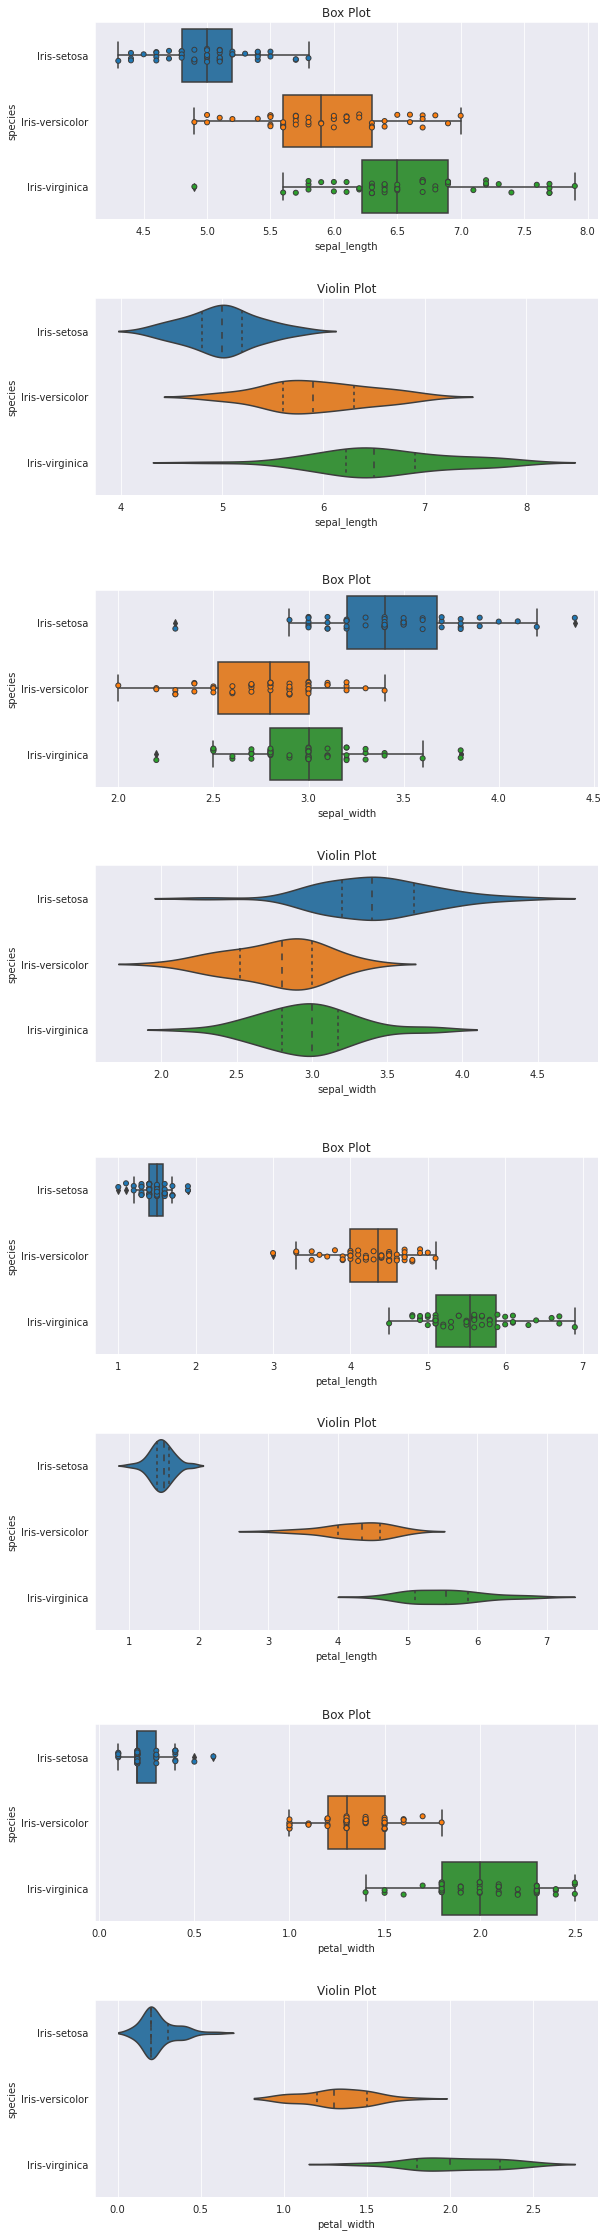

In [156]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(9, 40))
outer = gridspec.GridSpec(4, 1, wspace=0.2, hspace=0.2)

for i, col in enumerate(iris_data.columns[:-1]):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.2, hspace=0.4)

    ax = plt.Subplot(fig, inner[0])
    _ = sns.boxplot(y="species", x=f"{col}", data=iris_data, ax=ax)
    _ = sns.stripplot(y="species", x=f"{col}", data=iris_data,  jitter=True, dodge=True, linewidth=1, ax=ax)
    _ = ax.set_title("Box Plot")
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1])
    _ = sns.violinplot(y="species", x=f"{col}", data=iris_data, inner='quartile', ax=ax)
    # _ = sns.stripplot(x="species", y="petal_length", data=iris_data, jitter=True, dodge=True, linewidth=1, ax=ax)
    _ = ax.set_title("Violin Plot")
    fig.add_subplot(ax)
fig.show()

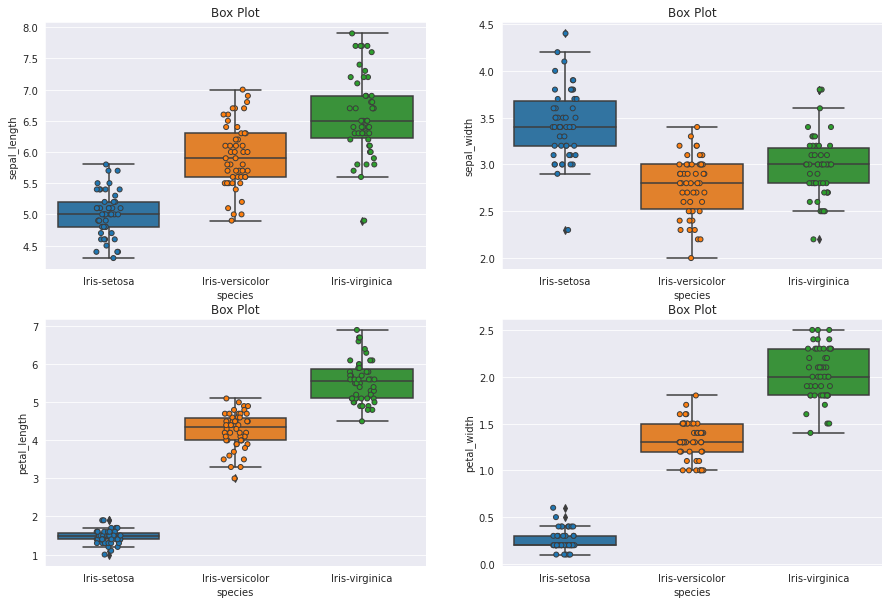

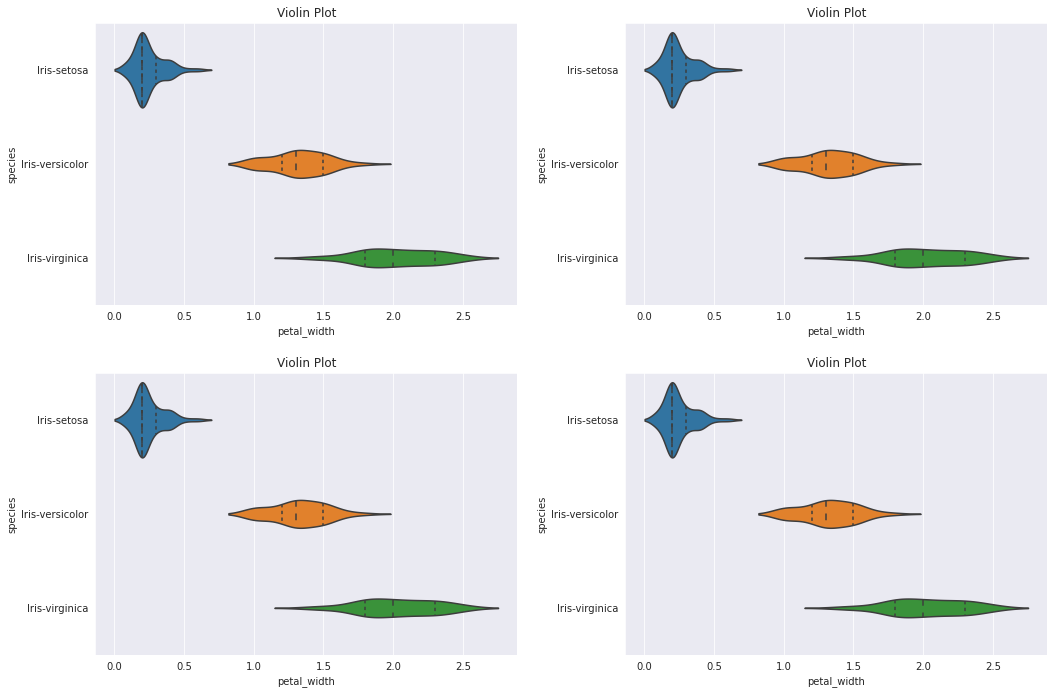

In [157]:
plt.figure(figsize=(15,10))    
for i, j in enumerate(iris_data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    _ = sns.boxplot(x="species", y=f"{j}", data=iris_data)
    _ = sns.stripplot(x="species", y=f"{j}", data=iris_data,  jitter=True, dodge=True, linewidth=1)
    _ = plt.title("Box Plot")    

plt.figure(figsize=(15,10))    
for i, j in enumerate(iris_data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    _ = sns.violinplot(y="species", x=f"{col}", data=iris_data, inner='quartile')
    # _ = sns.stripplot(x="species", y="petal_length", data=iris_data, jitter=True, dodge=True, linewidth=1, ax=ax)
    _ = plt.title("Violin Plot")
plt.tight_layout(pad=2)

In [158]:
def simple_rule(subset):
    cls = []
    for idx, row in subset.iterrows():
        if row['petal_length'] <= 2:
            cls.append("Iris-setosa")
        elif row['petal_length'] > 2 and row['petal_length'] <=4.6:
            cls.append("Iris-versicolor")
        else:
            cls.append("Iris-virginica")
    # accuracy
    cls = np.array(cls)
        
    return accuracy_score(cls, subset.species.values)

In [159]:
iris_data.sample(frac=1)

random_idx = np.random.choice(range(0, 150), 20)
simple_rule(iris_data.sample(frac=1).iloc[random_idx])

0.9

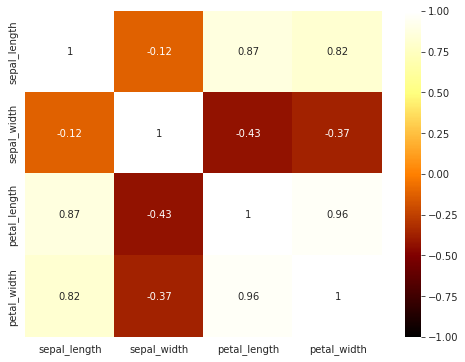

In [160]:
plt.figure(figsize=(8, 6))
_ = sns.heatmap(iris_data.corr(), vmin=-1, vmax=1, annot=True, cmap='afmhot')

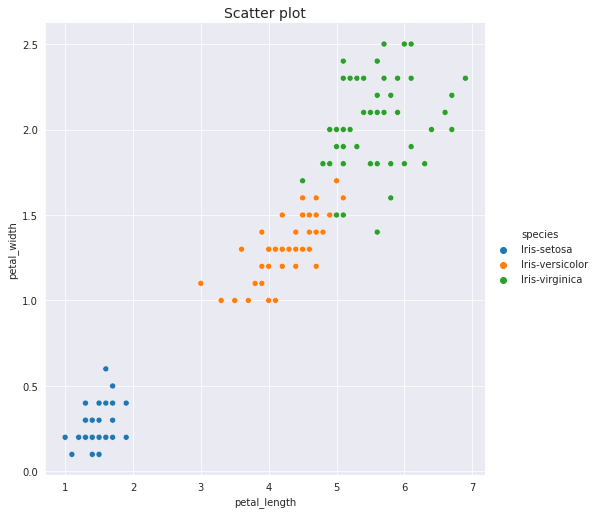

In [161]:
_ = sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris_data, height=7)
_ = plt.title("Scatter plot", fontsize=14)

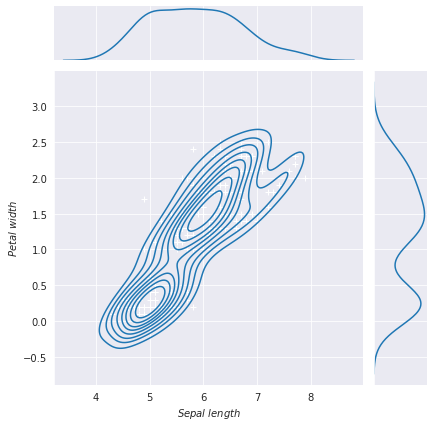

In [162]:
g = sns.jointplot(x="sepal_length", y="petal_width", data=iris_data, kind="kde")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Sepal$ $length$", "$Petal$ $width$");



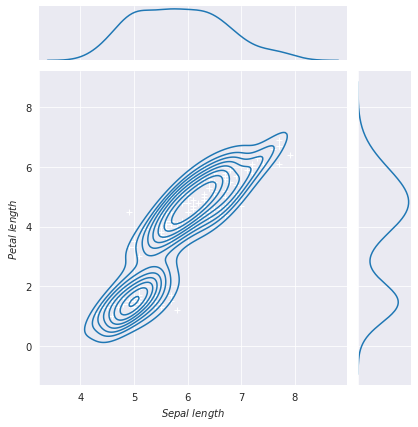

In [128]:
p = sns.jointplot(x="sepal_length", y="petal_length", data=iris_data, kind="kde")
p.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
p.ax_joint.collections[0].set_alpha(0)
p.set_axis_labels("$Sepal$ $length$", "$Petal$ $length$");

<Figure size 1080x720 with 0 Axes>

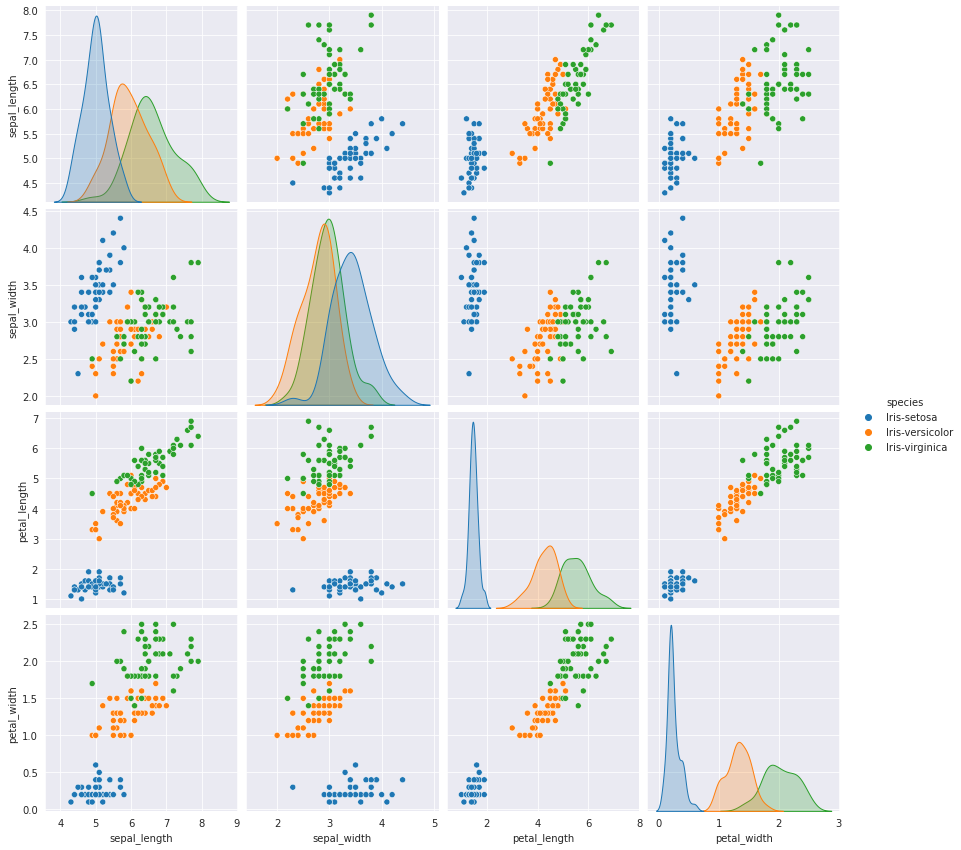

In [129]:
_ = plt.figure(figsize=(15, 10))
_ = sns.pairplot(iris_data, hue="species", height=3, diag_kind="kde")

In [130]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(iris_data, x='petal_length', y='petal_width', z='sepal_length',
                    color='species')
fig.show()

In [131]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:

for i, j in iris_data.groupby("species"):
    temp = j[['sepal_length', 'sepal_width', 'petal_length']]
    ax.scatter(temp['sepal_length'], temp['sepal_width'], \
           temp['petal_length'], s=40, edgecolor='k')

In [133]:
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")
plt.title("3D plot to check for seperation")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA

In [135]:
X = iris_data.drop(['species'], axis=1)
y = iris_data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [136]:
models = []

models.append(("LogisticRegression", LogisticRegression(max_iter=1000)))
models.append(("SVC", SVC(kernel="rbf", gamma=5, C=0.001, max_iter=1000)))

models.append(("KNeighbors", KNeighborsClassifier(n_neighbors=12)))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=42, max_features=None)
models.append(("RandomForest2", rf2))
models.append(('NB', GaussianNB()))
models.append(("MLPClassifier", MLPClassifier(hidden_layer_sizes=(10, 10), solver='adam', max_iter=2000, learning_rate='adaptive', random_state=42)))

In [137]:
for i in range(1, 5):
    cols = X.columns[:i]
    X_temp = X[cols].values
    results = []
    names = []
    for name, model in models:
        try:
            result = cross_val_score(model, X[cols], y, cv=5, scoring='accuracy')
        except:
            result = cross_val_score(model, X[cols].reshape(-1, 1), y, cv=5, scoring='accuracy')
        
        names.append(name)
        results.append(result)
    
    print(f"Using features: {cols}")
    
    for i in range(len(names)):
        # f"{'1':0>8}
        print(f"Algo: {names[i]}, Result: {round(results[i].mean(), 2)}")
    print()

Using features: Index(['sepal_length'], dtype='object')
Algo: LogisticRegression, Result: 0.75
Algo: SVC, Result: 0.71
Algo: KNeighbors, Result: 0.68
Algo: DecisionTree, Result: 0.69
Algo: RandomForest, Result: 0.72
Algo: RandomForest2, Result: 0.69
Algo: NB, Result: 0.73
Algo: MLPClassifier, Result: 0.74

Using features: Index(['sepal_length', 'sepal_width'], dtype='object')
Algo: LogisticRegression, Result: 0.81
Algo: SVC, Result: 0.77
Algo: KNeighbors, Result: 0.77
Algo: DecisionTree, Result: 0.73
Algo: RandomForest, Result: 0.74
Algo: RandomForest2, Result: 0.75
Algo: NB, Result: 0.79
Algo: MLPClassifier, Result: 0.79

Using features: Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')
Algo: LogisticRegression, Result: 0.95
Algo: SVC, Result: 0.91
Algo: KNeighbors, Result: 0.95
Algo: DecisionTree, Result: 0.91
Algo: RandomForest, Result: 0.94
Algo: RandomForest2, Result: 0.95
Algo: NB, Result: 0.88
Algo: MLPClassifier, Result: 0.96

Using features: Index(['sepal_

In [138]:
single_feature_models = models[:]
single_feature_models.pop(2)
single_feature_models.insert(2, ("KNeighbors", KNeighborsClassifier(n_neighbors=3)))

two_feature_models = models[:]
two_feature_models.pop(2)
two_feature_models.insert(2, ("KNeighbors", KNeighborsClassifier(n_neighbors=5)))

X_selected_1 = X[['petal_length']].values
X_selected_2 = X[['petal_length', 'petal_width']].values

X_ = [X_selected_1, X_selected_2]
y = y.ravel()

mods = [single_feature_models, two_feature_models]
for i in range(2):   
    curr_models = mods[i]
    names = []
    results = []
    for name, mod in curr_models:    
        if i == 0:
            result = cross_val_score(mod, X_selected_1.reshape(-1, 1), y, cv=5, scoring='accuracy')        
        else:
            result = cross_val_score(mod, X_selected_2, y, cv=5, scoring='accuracy')            
        
        names.append(name)
        results.append(result) 

    print(f"Features: {X_[i].shape[1]}")
    for j in range(len(names)):
        print(f"Algo: {names[j]}, Result: {round(results[j].mean(), 2)}")
    print()

Features: 1
Algo: LogisticRegression, Result: 0.95
Algo: SVC, Result: 0.95
Algo: KNeighbors, Result: 0.94
Algo: DecisionTree, Result: 0.92
Algo: RandomForest, Result: 0.93
Algo: RandomForest2, Result: 0.92
Algo: NB, Result: 0.95
Algo: MLPClassifier, Result: 0.95

Features: 2
Algo: LogisticRegression, Result: 0.96
Algo: SVC, Result: 0.96
Algo: KNeighbors, Result: 0.97
Algo: DecisionTree, Result: 0.95
Algo: RandomForest, Result: 0.97
Algo: RandomForest2, Result: 0.96
Algo: NB, Result: 0.96
Algo: MLPClassifier, Result: 0.96



In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [ ]:
X = iris_data.drop(['species'], axis=1)
y = iris_data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
print(X.shape)
print(y.shape)

In [139]:
x_train, x_val, y_train, y_val = train_test_split(X, y, shuffle=True, stratify=y, 
                                                  random_state=42, test_size=0.1)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.shuffle(150, reshuffle_each_iteration=True)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.shuffle(15, reshuffle_each_iteration=True)

In [ ]:
model = Sequential([
                    Input(shape=(4,)),
                    Dense(10, activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(3, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=0)

In [140]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), history.history['loss'], label="Loss")
plt.plot(range(1, 101), history.history['val_loss'], label="validation_loss")
plt.legend()
plt.title("Epoch Vs. loss")
plt.xlabel("Epoch")
plt.ylabel("loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, 101), history.history['accuracy'], label="accuracy")
plt.plot(range(1, 101), history.history['val_accuracy'], label="validation_accuracy")
plt.legend()
plt.title("Epoch Vs. accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
X = iris_data.drop(['species'], axis=1)
y = iris_data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [142]:
pca = PCA(n_components=0.95)
X_transformed = pca.fit_transform(X)
print(X_transformed.shape)
print(pca.n_components_)
print(pca.explained_variance_ratio_)

(150, 2)
2
[0.92461872 0.05306648]


In [143]:
x_train, x_val, y_train, y_val = train_test_split(X_transformed, y, shuffle=True, stratify=y, test_size=0.1)

log = LogisticRegression(max_iter=500)
log.fit(x_train, y_train)
pred = log.predict(x_val)
accuracy_score(y_val, pred)

0.9333333333333333